# The wrong intuition people have wrt car speed
## What is the problem: an example
Recently I attended a driving course in which we learned to handle over- and under-steer. First, a theory session was given, to raise awareness over a few points. In this notebook I will elaborate on one of those points. 

The question that was asked, was the following: 

> At 50 km/h you perform an emergency break. You are able to stop in time, leaving 0 m between you and an pedestrian, phew! Now, assuming that you were driving at 55 km/h, with what speed would you collide with the person?
> * A. 5 km/h
> * B. 13 km/h
> * C. 23 km/h
> * D. 33 km/h

Select the text after to see the answer: {

<font color='white'>C. 23 km/h !</font>

} If the text isn't rendered, scroll to the bottom of the notebook to view the answer.

That is unexpected! It has to do with the fact that energy is dissipated at a constant rate. As you may remember, kinetic energy scales with the velocity squared!

So let's do the calculation for our question:

In [234]:
# Baseline speed v1, and secondary speed v2
v1 = 50
v2 = 55

# The mass cancels in this problem
mass1 = 1
mass2 = 1*mass1

# Calculating the kinetic energy for each of the cases
Ekin1 = 0.5*mass1*v1**2
Ekin2 = 0.5*mass1*v2**2

# The leftover kinetic energy at the moment of collsion and corresponding speed
Ekin_rest = Ekin2 - Ekin1
v_collsion = (2*Ekin_rest)**0.5

print(f'Collision speed {int(v_collsion + 0.5)} km/h !')

Collision speed 23 km/h !


If this went to quick, Numberphile made a very nice video [here](https://youtu.be/i3D7XYQExt0) in which essentially the same calculation is done.

## Generalizing to different speeds
We have seen how this work for the specific case of increasing your speed from 50 to 55 km/h. However, we would like to have a more generalized result. For this we calculate the collision speed for baseline speeds ranging from 0 to 120 km/h and speed differences from 0 to 10 km/h.

In [293]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [298]:
# Use a speed range of 0 to 120 km/h
# speed increase from 0 to 10 km/h
v = np.linspace(0, 120, 240)
dv = np.linspace(0, 10, 50)

# get all possible combinations
V, DV = np.meshgrid(v, dv) 

# calculate 'rest speed', named colission speed
## masses, factors .5 and km/h --> m/s all cancel out
Z = np.sqrt((V + DV)**2 - V**2) 

# NOTE: we assume that the breaks dissipate a constant ammount of energy/time
## when speed differences are big this will almost for sure not hold
## as rpm of the tires is increased and thus the surface area on which
## you can dissipate energy.

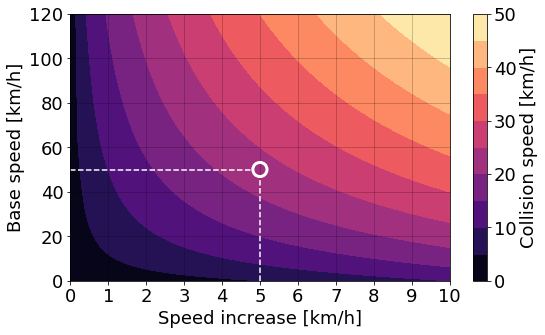

In [9]:
# set font and figuresize 
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure(figsize=(8,5))

# plot data 
plt.contourf(DV, V, Z, cmap='magma', levels=10)#, shading='gouraud')
plt.colorbar(label='Collision speed [km/h]')


# plot and example point, base speed of 50, increase to 55 km/h
plt.scatter(5, 50, 
            marker='o',  
            facecolors='none', 
            edgecolor='w', 
            s=200,
            linewidths=3, 
            zorder=4)

plt.plot([0, 4.8], [50, 50], ls='--', color='w')
plt.plot([5, 5], [0, 47], ls='--', color='w')


# set ticks and grid
plt.xticks(np.linspace(0, 10, 11))
plt.yticks(np.linspace(0, 120, 7))

plt.grid(True, ls='-', lw=1, c='k', alpha=0.2)

# name axes
plt.ylabel('Base speed [km/h]')
plt.xlabel('Speed increase [km/h]')

# export
plt.tight_layout()
plt.savefig('collision_plot.png', dpi=300)

The example with a base speed of 50 km/h and a increased speed of 55 km/h is highlighted by the white circle. As you can see the color matches, just above 20 km/h on the legend, as calculated earlier.

Another example: for 120 km/h vs 130 km/h the collision speed is 50 km/h!

## Breaking speed curve

To visualize it in another way we will visualize how you speed reduces as a function of breaking distance. 

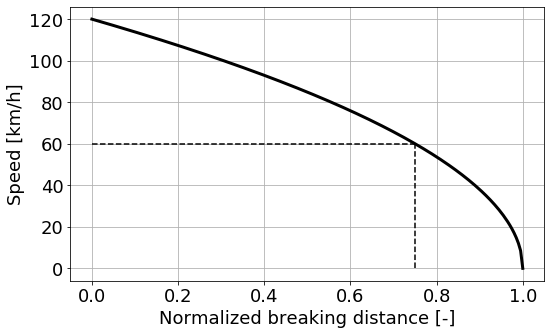

In [221]:
# Assume a weight of the car and speed from which to break
weight = 1800e3
max_velocity = 120

# calc the kinetic energy (in the end unecesarry since it will be normalized)
E = np.linspace(0, ((max_velocity/3.6)**2)*weight/2, 200)
V = np.sqrt(2*E/weight)*3.6

# plot results
plt.figure(figsize=(8,5))
plt.plot(E[::-1]/np.max(E), V, c='k', lw=3)
plt.grid(True)

plt.plot([.75, 0.75], [0, 60], ls='--', color='k')
plt.plot([0, 0.75], [60, 60], ls='--', color='k')

plt.ylabel('Speed [km/h]')
plt.xlabel('Normalized breaking distance [-]')

# export
plt.tight_layout()
plt.savefig('breaking_velocity.png', dpi=300)

Conclusion 50 % of the speed is lost in the last 25 % of your breaking distance!

---

The answer from the top question: C. 23 km/h !